In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
games = pd.read_csv("games.csv")

In [3]:
elo_w = games['white_rating']
elo_b = games['black_rating']
elo = np.hstack((elo_w,elo_b))
# Caclul du nombre total de joueurs différents
id_players = np.hstack((np.array(games['black_id']),np.array(games['white_id'])))
id_player = np.unique(id_players)


Nombre total de parties :  20058
Nombre total de joueurs différents : 15635
Moyenne du classement élo des joueurs sur chaque partie : 1592.73
Médiane du classement élo des joueurs sur chaque partie : 1564.0
Classement élo maximum : 2723
Classement élo minimum : 784


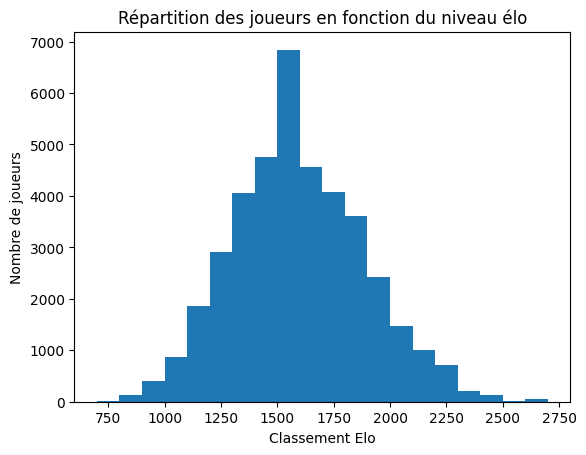

In [4]:
# Visualisation des données sous la forme de graphiques
average_rating = np.round(np.mean(elo),2);
median_rating = np.round(np.median(elo),2);
plt.hist(elo,bins=range(700,2800,100))
plt.title("Répartition des joueurs en fonction du niveau élo");
plt.xlabel("Classement Elo");
plt.ylabel("Nombre de joueurs");
print("Nombre total de parties : ",games.shape[0])
print("Nombre total de joueurs différents :",id_player.size)
print("Moyenne du classement élo des joueurs sur chaque partie :",average_rating)
print("Médiane du classement élo des joueurs sur chaque partie :",median_rating)
print("Classement élo maximum :",np.max(elo))
print("Classement élo minimum :",np.min(elo))

In [5]:
#Pourquoi autant de joueurs aux alentours de 1500 élo
elo_1500 = np.size(elo[(elo>=1400)&(elo<=1600)])
print("Pourcentage de joueurs entre 1400 et 1600 élo : ",np.round(elo_1500/20058*100,2),"%")
elo_1500 = np.size(elo[(elo==1500)])
print("Pourcentage de joueurs à exactemet 1500 élo : ",np.round(elo_1500/20058*100,2),"%")

Pourcentage de joueurs entre 1400 et 1600 élo :  58.15 %
Pourcentage de joueurs à exactemet 1500 élo :  8.02 %


Nb. victoires blancs : 10001 
N.b victoires énoirs : 9107 
match nul : 950


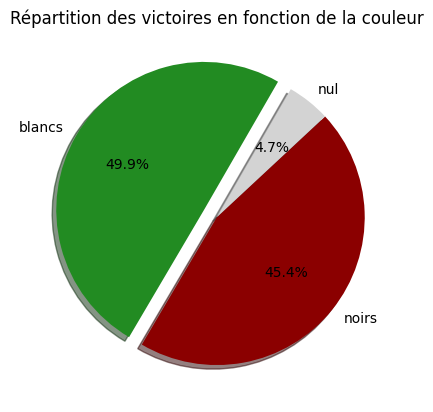

In [6]:
# Visualisation de la répartition des résultats des parties en fonction de la couleur

w_white = games[games['winner'] == 'white'].shape[0]
w_black = games[games['winner'] == 'black'].shape[0]
draw = games[games['winner']=='draw'].shape[0]
labels = 'blancs','noirs','nul'
fig, ax = plt.subplots()
ax.pie([w_white,w_black,draw],explode=(0.1, 0, 0), labels=labels, autopct='%1.1f%%',colors=['forestgreen','darkred','lightgrey'],shadow=True, startangle=60)
plt.title("Répartition des victoires en fonction de la couleur");
print("Nb. victoires blancs :",w_white,"\nN.b victoires énoirs :",w_black,"\nmatch nul :",draw)

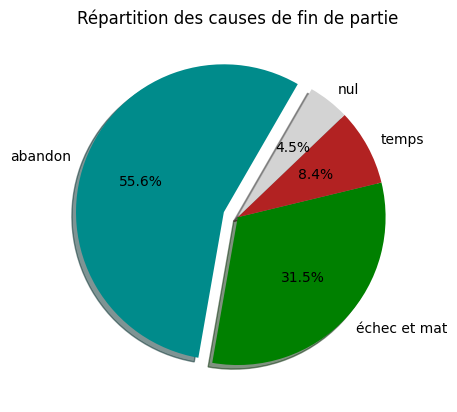

In [7]:
# Visualisation des causes de fin de partie
res = games[games['victory_status']== 'resign'].shape[0]
mate = games[games['victory_status']== 'mate'].shape[0]
tim = games[games['victory_status']== 'outoftime'].shape[0]
draw = games[games['victory_status']== 'draw'].shape[0]
labels2 = 'abandon','échec et mat','temps','nul'
fig, ax = plt.subplots()
ax.pie([res,mate,tim,draw], labels=labels2, autopct='%1.1f%%',shadow=True,explode = (0.1, 0, 0,0),startangle=60,colors=['darkcyan','green','firebrick','lightgrey'])
plt.title("Répartition des causes de fin de partie");

In [8]:
# Déterminer le joueur le mieux classé et s'il a gagné
games['diff_elo'] = games['white_rating'] - games['black_rating']

Nb victoires élo supérieur : 2817.0 
Nb victoires élo inférieur : 2657.0 
Nb total de parties : 5474


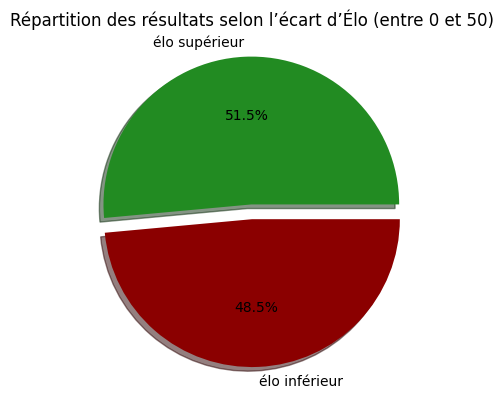

In [9]:
# Cas de différence d'élo

filt = games[((np.abs(games["diff_elo"])).between(0,50))]
nb_total50 = filt.shape[0]
elo_sup50 = filt[(filt['winner']=='white')&(filt['diff_elo']>0)].shape[0] + filt[(filt['winner']=='black')&(filt['diff_elo']<0)].shape[0]
elo_inf50 = filt[(filt['winner']=='black')&(filt['diff_elo']>0)].shape[0] + filt[(filt['winner']=='white')&(filt['diff_elo']<0)].shape[0]
draw50 = nb_total50 - elo_sup50 - elo_inf50
elo_sup50 += draw50/2
elo_inf50 += draw50/2

labels3 = 'élo supérieur','élo inférieur'
fig, ax = plt.subplots()
ax.pie([elo_sup50,elo_inf50], labels=labels3, autopct='%1.1f%%',shadow=True,explode=(0.1,0),colors=['forestgreen','darkred'])
plt.title("Répartition des résultats selon l’écart d’Élo (entre 0 et 50)");
print("Nb victoires élo supérieur :",elo_sup50,"\nNb victoires élo inférieur :",elo_inf50,"\nNb total de parties :",nb_total50)

Nb victoires élo supérieur : 2087 
Nb victoires élo inférieur : 1491 
Nb total de parties : 3779


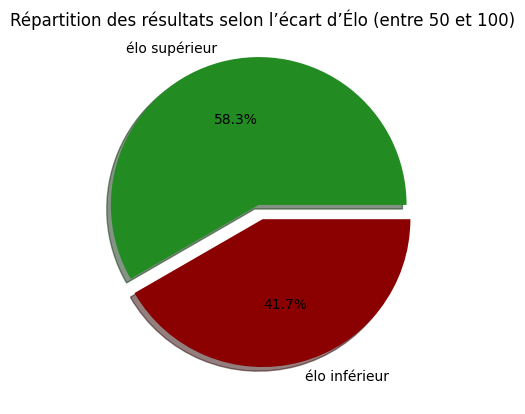

In [10]:
# Cas de différence d'élo

filt = games[((np.abs(games["diff_elo"])).between(50,100))]
nb_total = filt.shape[0]
elo_sup = filt[(filt['winner']=='white')&(filt['diff_elo']>0)].shape[0] + filt[(filt['winner']=='black')&(filt['diff_elo']<0)].shape[0]
elo_inf = filt[(filt['winner']=='black')&(filt['diff_elo']>0)].shape[0] + filt[(filt['winner']=='white')&(filt['diff_elo']<0)].shape[0]

fig, ax = plt.subplots()
ax.pie([elo_sup,elo_inf], labels=labels3, autopct='%1.1f%%',shadow=True,explode=(0.1,0),colors=['forestgreen','darkred'])
plt.title("Répartition des résultats selon l’écart d’Élo (entre 50 et 100)");
print("Nb victoires élo supérieur :",elo_sup,"\nNb victoires élo inférieur :",elo_inf,"\nNb total de parties :",nb_total)

Nb victoires élo supérieur : 2883 
Nb victoires élo inférieur : 1523 
Nb total de parties : 4629


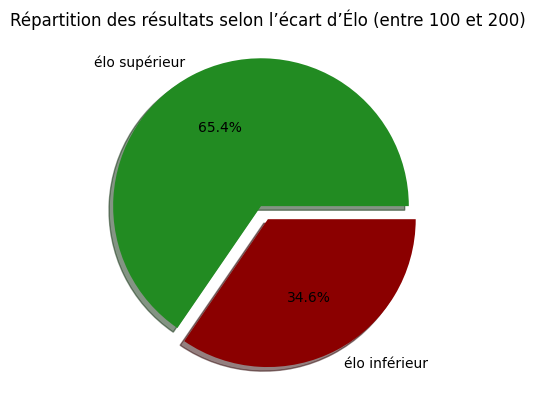

In [11]:
# Cas de différence d'élo absurde

filt = games[((np.abs(games["diff_elo"])).between(100,200))]
nb_total = filt.shape[0]
elo_sup = filt[(filt['winner']=='white')&(filt['diff_elo']>0)].shape[0] + filt[(filt['winner']=='black')&(filt['diff_elo']<0)].shape[0]
elo_inf = filt[(filt['winner']=='black')&(filt['diff_elo']>0)].shape[0] + filt[(filt['winner']=='white')&(filt['diff_elo']<0)].shape[0]

fig, ax = plt.subplots()
ax.pie([elo_sup,elo_inf], labels=labels3, autopct='%1.1f%%',shadow=True,explode=(0.1,0),colors=['forestgreen','darkred'])
plt.title("Répartition des résultats selon l’écart d’Élo (entre 100 et 200)");
print("Nb victoires élo supérieur :",elo_sup,"\nNb victoires élo inférieur :",elo_inf,"\nNb total de parties :",nb_total)